Heart Disease Research Part II
In this project, you’ll investigate some data from a sample patients who were evaluated for heart disease at the Cleveland Clinic Foundation. The data was downloaded from the UCI Machine Learning Repository and then cleaned for analysis. The principal investigators responsible for data collection were:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
Note that a solution.py file is loaded for you in the workspace, which contains solution code for this project. We highly recommend that you complete the project on your own without checking the solution, but feel free to take a look if you get stuck or want to check your answers when you’re done!

Finally, we ask you to both print results and graph results in this project. Sometimes the printouts are formatted in a way that is difficult to read — feel free to expand the middle segment to make your printouts more readable.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway, chi2_contingency
from statsmodels.stats.multicomp import pairwise_tukeyhsd

1
The data has been saved as a dataframe named heart in script.py. It contains the following variables:

age: age in years
sex: sex assigned at birth; 'male' or 'female'
trestbps: resting blood pressure in mm Hg
chol: serum cholesterol in mg/dl
cp: chest pain type ('typical angina', 'atypical angina', 'non-anginal pain', or 'asymptomatic')
exang: whether the patient experiences exercise-induced angina (1: yes; 0: no)
fbs: whether the patient’s fasting blood sugar is >120 mg/dl (1: yes; 0: no)
thalach: maximum heart rate achieved in exercise test
heart_disease: whether the patient is found to have heart disease ('presence': diagnosed with heart disease; 'absence': no heart disease)
Inspect the first few rows of data using the .head() method.

In [36]:
heart = pd.read_csv('heart_disease.csv')
print(heart.head())
print(heart.shape)

    age     sex  trestbps   chol                cp  exang  fbs  thalach  \
0  63.0    male     145.0  233.0    typical angina    0.0  1.0    150.0   
1  67.0    male     160.0  286.0      asymptomatic    1.0  0.0    108.0   
2  67.0    male     120.0  229.0      asymptomatic    1.0  0.0    129.0   
3  37.0    male     130.0  250.0  non-anginal pain    0.0  0.0    187.0   
4  41.0  female     130.0  204.0   atypical angina    0.0  0.0    172.0   

  heart_disease  
0       absence  
1      presence  
2      presence  
3       absence  
4       absence  
(303, 9)


2.
Each of the patients in this dataset underwent an exercise test, during which their heart rate was monitored. For each patient, thalach gives us the highest heart rate that the patient achieved during this test.

Is thalach associated with whether or not a patient will ultimately be diagnosed with heart disease? Use sns.boxplot() to plot side by side box plots of thalach for patients who were and were not diagnosed with heart disease (indicated by the heart_disease variable). Do you think there is a relationship between these variables?

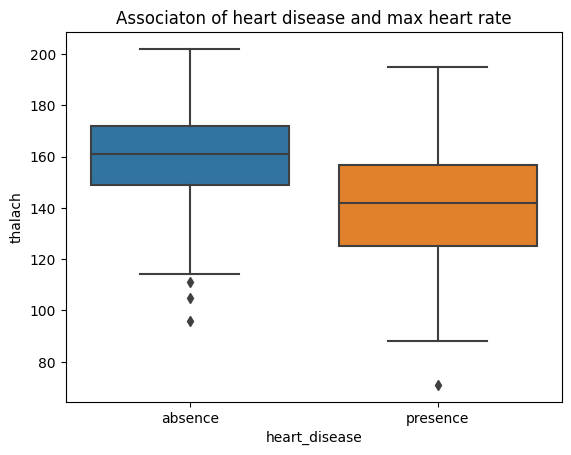

<Figure size 640x480 with 0 Axes>

In [37]:
sns.boxplot(x='heart_disease', y='thalach', data=heart)
plt.title('Associaton of heart disease and max heart rate')
plt.show()
plt.clf()

3.
In order to investigate this question further, save the values for thalach among patients who were diagnosed with heart disease as a variable named thalach_hd. Then save the values of thalach among patients who were not diagnosed with heart disease as thalach_no_hd.

4.
Calculate and print the difference in mean thalach for patients diagnosed with heart disease compared to patients without heart disease. Then do the same for the median difference.

In [38]:
thalach_hd = heart.thalach[heart.heart_disease == 'presence']
thalach_no_hd = heart.thalach[heart.heart_disease == 'absence']

mean_diff = np.mean(thalach_hd) - np.mean(thalach_no_hd)
median_diff = np.median(thalach_hd) - np.median(thalach_no_hd)
print(f'Mean difference is {mean_diff}, the median difference is {median_diff}')

Mean difference is -19.11905597473242, the median difference is -19.0


5.
We’d like to find out if the average thalach of a heart disease patient is significantly different from the average thalach for a person without heart disease.

Import the statistical test from scipy.stats that we would use to test the following null and alternative hypotheses:

Null: The average thalach for a person with heart disease is equal to the average thalach for a person without heart disease.
Alternative: The average thalach for a person with heart disease is NOT equal to the average thalach for a person without heart disease.

6.
Run the hypothesis test from task 5 and print out the p-value. Using a significance threshold of 0.05, is there a significant difference in average thalach for people with heart disease compared to people with no heart disease?

In [39]:
tstat_thal, pval_thal = ttest_ind(thalach_hd, thalach_no_hd)
sig_thres = 0.05

if pval_thal < sig_thres:
  print(f'''There is a significance difference in max heart rate between the people who has heart disease
and who has not, so we can reject the null hypothesis. The pval is {pval_thal}\n''')
else:
  print('''There is not significance difference in max heart rate between the people who has heart disease
and who has not, so we can accept the null hypothesis.''')

There is a significance difference in max heart rate between the people who has heart disease
and who has not, so we can reject the null hypothesis. The pval is 3.456964908430172e-14



7.
Using the same process, investigate at least one other quantitative variable. Options include age, trestbps (resting blood pressure), and chol (cholesterol). Are any of these variables also significantly associated with heart disease?

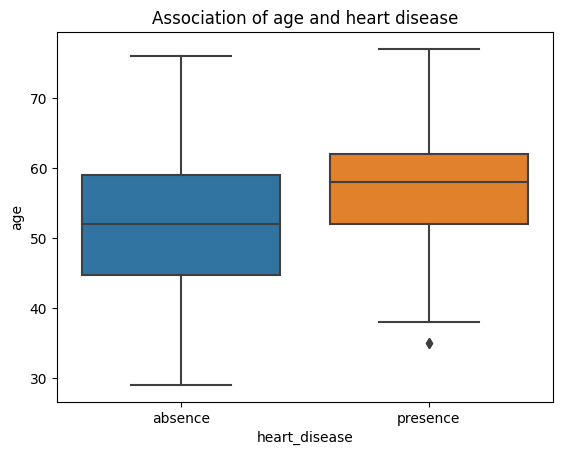

<Figure size 640x480 with 0 Axes>

In [40]:
sns.boxplot(y='age', x='heart_disease', data=heart)
plt.title('Association of age and heart disease')
plt.show()
plt.clf()

In [41]:
age_hd = heart.age[heart.heart_disease == 'presence']
age_hd_no = heart.age[heart.heart_disease == 'absence']

print(f'The mean diff is {np.mean(age_hd)-np.mean(age_hd_no)}, the median diff is {np.median(age_hd)-np.median(age_hd_no)}\n')

stat, pval_age = ttest_ind(age_hd, age_hd_no)

if pval_age < sig_thres:
  print(f'''There is a significance difference in age between the people who has heart disease and who has not,
so we can reject the null hypothesis. The pval is {pval_age}''')
else:
  print('''There is not significance difference in max heart rate between the people who has heart disease
and who has not, so we can accept the null hypothesis.''')


The mean diff is 4.040533426917001, the median diff is 6.0

There is a significance difference in age between the people who has heart disease and who has not,
so we can reject the null hypothesis. The pval is 8.955636917529706e-05


8.
Next, let’s investigate the relationship between thalach (maximum heart rate achieved during exercise) and the type of heart pain a person experiences. Create a set of side-by-side box plots of thalach for each chest pain type in the data. Make sure to use plt.clf() to clear the previous plots first!

Are there any chest pain types for which average thalach is significantly higher or lower (compared to other chest pain types)?

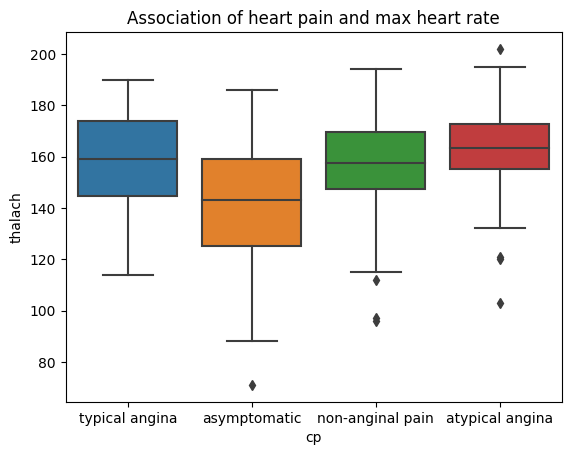

<Figure size 640x480 with 0 Axes>

In [42]:
sns.boxplot(x='cp', y='thalach', data=heart)
plt.title('Association of heart pain and max heart rate')
plt.show()
plt.clf()






9.
To investigate this further, save the values of thalach for patients who experienced each type of chest pain as thalach_typical, thalach_asymptom, thalach_nonangin, and thalach_atypical, respectively.

10.
Run a single hypothesis test to address the following null and alternative hypotheses:

Null: People with typical angina, non-anginal pain, atypical angina, and asymptomatic people all have the same average thalach.
Alternative: People with typical angina, non-anginal pain, atypical angina, and asymptomatic people do not all have the same average thalach.
Save the resulting p-value as pval and print it out. Using a significance threshold of 0.05, is there at least one pair of chest pain categories for which people in those categories have significantly different thalach?

11.
If you completed the previous step correctly, you should have concluded that there is at least one pair of chest pain types (cp) for which people with those pain types have significantly different average max heart rates during exercise (thalach).

Run another hypothesis test to determine which of those pairs are significantly different. Use an overall type I error rate of 0.05 for all six comparisons.


In [43]:
thalach_typical = heart.thalach[heart.cp == 'typical angina']
thalach_asymptom = heart.thalach[heart.cp == 'asymptomatic']
thalach_nonangin = heart.thalach[heart.cp == 'non-anginal pain']
thalach_atypical = heart.thalach[heart.cp == 'atypical angina']

stat, pval = f_oneway(thalach_typical, thalach_asymptom, thalach_nonangin, thalach_atypical)

print(pval)
results = pairwise_tukeyhsd(endog = heart.thalach, groups = heart.cp)
print(results)

1.9065505247705742e-10
           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1           group2      meandiff p-adj   lower    upper  reject
-------------------------------------------------------------------------
    asymptomatic  atypical angina  21.7394    0.0  12.7442 30.7347   True
    asymptomatic non-anginal pain  14.7264    0.0   7.2583 22.1945   True
    asymptomatic   typical angina   15.276 0.0081   2.9707 27.5812   True
 atypical angina non-anginal pain   -7.013 0.2481 -16.7587  2.7327  False
 atypical angina   typical angina  -6.4635 0.6213 -20.2702  7.3432  False
non-anginal pain   typical angina   0.5495 0.9995 -12.3145 13.4136  False
-------------------------------------------------------------------------


12.
Finally, let’s investigate the relationship between the kind of chest pain a person experiences and whether or not they have heart disease. Create a contingency table of cp and heart_disease and save it as Xtab, then print it out.

13.
Run a hypothesis test for the following null and alternative hypotheses:

Null: There is NOT an association between chest pain type and whether or not someone is diagnosed with heart disease.
Alternative: There is an association between chest pain type and whether or not someone is diagnosed with heart disease.
Save the p-value as pval and print it out. Using a significance threshold of 0.05, is there a significant association between chest pain type and whether or not someone is diagnosed with heart disease?

In [44]:
xtab = pd.crosstab(heart.cp, heart.heart_disease)
print('\n',xtab)
stat, pval_cp, dof, expected = chi2_contingency(xtab)
if pval_cp < sig_thres:
  print(f'\nThere is a association between chest pain type and whether someone has a heart disease or not. The pval is {pval_cp} so we can reject the null hypothesis.')
else:
  print('There is no association.')


 heart_disease     absence  presence
cp                                 
asymptomatic           39       105
atypical angina        41         9
non-anginal pain       68        18
typical angina         16         7

There is a association between chest pain type and whether someone has a heart disease or not. The pval is 1.2517106007837527e-17 so we can reject the null hypothesis.


Further Exploration
14.
Congratulations! You’ve used a sample of data to understand how health related outcomes are associated with heart disease. Now that you’ve gotten your feet wet, there are a number of additional variables in this dataset that we haven’t looked at yet! If you want additional practice, use this space to continue your investigation. What other variables might be predictive of heart disease? Can you identify which hypothesis test to use for each variable?

As a reminder, the variables in this data are:

age: age in years
sex: sex assigned at birth; 'male' or 'female'
trestbps: resting blood pressure in mm Hg
chol: serum cholesterol in mg/dl
cp: chest pain type ('typical angina', 'atypical angina', 'non-anginal pain', or 'asymptomatic')
exang: whether the patient experiences exercise-induced angina (1: yes; 0: no)
fbs: whether the patient’s fasting blood sugar is >120 mg/dl (1: yes; 0: no)
thalach: maximum heart rate achieved in exercise test
heart_disease: whether the patient is found to have heart disease ('presence': diagnosed with heart disease; 'absence': no heart disease)